# Beer's Law and Principles of Quantitative Analysis
## Learning Objectives
- Describe the differences between qualitative and quantitative analysis.
- Based on results for standards that each contain an analyte at a known concentration, construct a calibration curve and determine a response function.
- Based on a response function and results for a sample containing an analyte at an unknown concentration, determine the concentration of the analyte.
- Define the accuracy and precision of a chemical measurement. Give examples of how determinate and indeterminate errors affect results from chemical measurements.

## Fundamentals of Analytical Chemistry
Analytical chemistry is focused on characterizing the composition of matter:
- *Analyte*: the molecule or species in a sample that is being analyzed.
- *Qualitative analysis*: is the analyte present in the sample?
- *Quantitative analysis*: how much of the analyte is present in the sample?
  
Analytical chemistry research is usually focused on improving, extending, and/or characterizing methods for chemical analysis. For example:
- Developing a new measurement technique.
- Applying a measurement technique to a new analyte.
- Applying a measurement technique to a new type of sample (e.g., fish from a lake versus lake water) or in a new setting (e.g., field-based versus laboratory-based measurements).
- Developing and validating a protocol for use in routine chemical analysis (rather than performing routine chemical analysis using an established protocol).


## Response Function
A response function relates the $signal$ (the observable of a measurement) to the concentration or amount of an analyte in a sample. In the simplest case:  
$Signal = K[analyte]$  

where $K$ is the response factor, which is how the signal responds to changes in the concentration or amount of an analyte in a sample. For example, in UV-Vis spectrophotometry the absorbance is the product of the molar absorptivity, path length, and concentration of the analyte:  
$Absorbance = \varepsilon l [analyte]$

Note that the response function for a measurement will depend one the protocol used to perform the measurement. The protocol includes all steps involved in the sampling (how the samples are acquired), sample preparation (how the sample is treated and manipulated prior to analysis), and the actual measurement.




# Quantitative Analysis With External Standards
The simplest way to characterize the response function for a protocol is to perform the protocol on **external standards**, which are solutions that were prepared with a known amount of the analyte. The standards are then analyzed and the results are plotted in order to determine the response function.

In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (3,2)
mpl.rcParams['figure.dpi'] = 300

mpl.rcParams['font.size'] = 8
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = "Open Sans"

mpl.rcParams['lines.linewidth'] = 1.0

mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelweight'] = "bold"

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['xtick.major.size'] = 3 #6
mpl.rcParams['xtick.minor.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1.5

mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['ytick.major.size'] = mpl.rcParams['xtick.major.size']
mpl.rcParams['ytick.major.width'] = mpl.rcParams['xtick.major.width']
mpl.rcParams['ytick.minor.width'] = mpl.rcParams['xtick.minor.width']

mpl.rcParams['legend.fancybox'] = True

mpl.rcParams['axes.titlesize'] = mpl.rcParams['font.size']
mpl.rcParams['axes.titleweight'] = mpl.rcParams['axes.labelweight']



In [14]:
# Generate a color palate.
colors = mpl.cm.magma(np.linspace(0,1,6))

Molar concentrations of external standards: [0.     0.0002 0.0004 0.0006 0.0008 0.001 ]
Absorbance measured for the external standards: [0.   0.22 0.44 0.66 0.88 1.1 ]
The slope is: 1100.0000000000002 M^-1
The intercept is: -4.079219866531555e-16


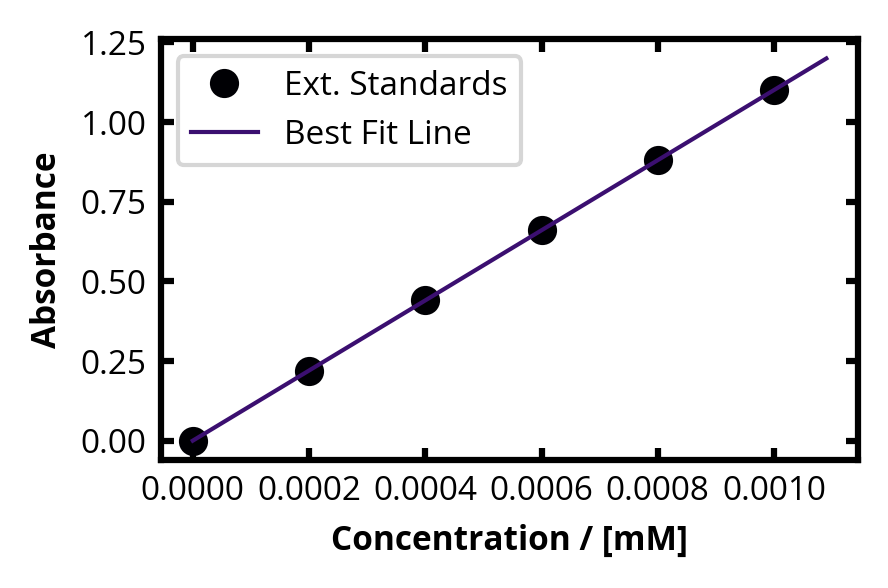

In [35]:
"""
This is a simple example of using external standards to determin a response function.
Standards were prepared that had analyte concentrations ranging from 0.000 to 0.001 M. 
Those standard solutions were then analyzed individually using UV-vis spectrophotometry.
"""

concentration = np.arange(0.0,0.0011,0.0002)
print('Molar concentrations of external standards: ' + str(concentration))
absorbance = np.array([0., 0.22, 0.44, 0.66, 0.88, 1.1])
print('Absorbance measured for the external standards: ' + str(absorbance))

fig, ax = plt.subplots(tight_layout=True) 
ax.plot(concentration,absorbance,c=colors[0],marker='o',ls='',label='Ext. Standards')

coefficients = np.polynomial.polynomial.polyfit(concentration,absorbance,1)
print('The slope is: ' + str(coefficients[1]) + ' M^-1')
print('The intercept is: ' + str(coefficients[0]))
x = np.arange(0.0,0.0011,0.00001)
y = np.polynomial.polynomial.polyval(x,coefficients)
ax.plot(x,y,c=colors[1],marker='',ls='-',label='Best Fit Line')

ax.set_xlabel('Concentration / [mM]')
ax.set_ylabel('Absorbance')
ax.legend(loc='upper left')
plt.show()


**Figure 1.** An example of a calibration plot determined from results for external standards. Here, five external standards of known analyte concentration were analyzed using the same method. The signal was plotted as a function of analyte concentration. Linear regression of these data was used to determine the line-of-best fit, which is the response function for the method.